In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.special import expit

#### Playground

In [ ]:
# Mode == Weights

D_j = 0.5 

player = [0.1, 0.5, 0.9]
player_label = ['safe', 'random', 'risky']

question = [0.9, 0.5, 0.1]
question_label = ['low information', 'medium information', 'high information']

for i,p in enumerate(player):
    for j,q in enumerate(question):
        prob = p * (1-q) + D_j * q
        print(f'Player {player_label[i]} with question {question_label[j]} ---> Prob to answer risky = {prob:.2f}')
    print('')

Player safe with question low information ---> Prob to answer risky = 0.46
Player safe with question medium information ---> Prob to answer risky = 0.30
Player safe with question high information ---> Prob to answer risky = 0.14

Player random with question low information ---> Prob to answer risky = 0.50
Player random with question medium information ---> Prob to answer risky = 0.50
Player random with question high information ---> Prob to answer risky = 0.50

Player risky with question low information ---> Prob to answer risky = 0.54
Player risky with question medium information ---> Prob to answer risky = 0.70
Player risky with question high information ---> Prob to answer risky = 0.86



In [ ]:
# Mode == Rasch

player = [0.1, 0.5, 0.9]
player_label = ['safe', 'random', 'risky']

question = [0.1, 0.5, 0.9]
question_label = ['high risk bias', 'medium risk bias', 'low risk bias']

for i,p in enumerate(player):
    for j,q in enumerate(question):
        prob = 1/(1+math.exp(q-p))
        print(f'Player {player_label[i]} with question {question_label[j]} ---> Prob to answer risky = {prob:.2f}')
    print('')

Player safe with question high risk bias ---> Prob to answer risky = 0.50
Player safe with question medium risk bias ---> Prob to answer risky = 0.40
Player safe with question low risk bias ---> Prob to answer risky = 0.31

Player random with question high risk bias ---> Prob to answer risky = 0.60
Player random with question medium risk bias ---> Prob to answer risky = 0.50
Player random with question low risk bias ---> Prob to answer risky = 0.40

Player risky with question high risk bias ---> Prob to answer risky = 0.69
Player risky with question medium risk bias ---> Prob to answer risky = 0.60
Player risky with question low risk bias ---> Prob to answer risky = 0.50



In [ ]:
# Mode == Rasch_2

player = [-2, 0, 2]
player_label = ['safe', 'random', 'risky']

question = [0.2, 0.55, 0.9]
question_label = ['low information', 'medium information', 'high information']

for i,p in enumerate(player):
    for j,q in enumerate(question):
        prob = 1/(1+math.exp(-p*q))
        print(f'Player {player_label[i]} with question {question_label[j]} ---> Prob to answer risky = {prob:.2f}')
    print('')

Player safe with question low information ---> Prob to answer risky = 0.40
Player safe with question medium information ---> Prob to answer risky = 0.25
Player safe with question high information ---> Prob to answer risky = 0.14

Player random with question low information ---> Prob to answer risky = 0.50
Player random with question medium information ---> Prob to answer risky = 0.50
Player random with question high information ---> Prob to answer risky = 0.50

Player risky with question low information ---> Prob to answer risky = 0.60
Player risky with question medium information ---> Prob to answer risky = 0.75
Player risky with question high information ---> Prob to answer risky = 0.86



## Simulator

In [ ]:
### Inputs 

n_players = 500
prevalence_profiles = [0.3, 0.2, 0.5]  # Must add to 1

D_j = 0.5

n_questions = 15
questions_output = {'risky_answer': 1,
                    'safe_answer' : 0}

profiles_dict = {'risky' : 2,
                 'random': 0,
                 'safe'  : -2}

### Players

class Player:
  def __init__(self, profile='random'):
    self.profile = profile
    self.risk_prob = profiles_dict.get(profile)

  def play_game(self, game, mode='rasch_2'):
    answers_player = []
    for question in game.difficulty_questions:
      if mode == 'weights':
        # Prob. to answer risky = p(i) * (1-W(j)) + D(j) * W(j)
        prob_answer_risky = self.risk_prob * (1-question) + D_j * question
      elif mode == 'rasch':
        # Prob. to answer risky = 1 / 1+e^(Q-P)
        prob_answer_risky = 1/(1 + math.exp(question - self.risk_prob))
      elif mode == 'rasch_2':
        # Prob. to answer risky = 1 / 1+e^(-P*Q)
        prob_answer_risky = 1/(1 + math.exp(-self.risk_prob * question))
      prob_answer_safe = 1 - prob_answer_risky
      answer = np.random.choice(list(questions_output.values()), p=[prob_answer_risky, prob_answer_safe])
      answers_player.append(answer)
    # Add profile
    answers_player.append(self.profile)
    return answers_player


### Game

class Game:
  def __init__(self, n=10):
    low_limit = 0.2
    high_limit = 0.9
    self.difficulty_questions = np.random.uniform(low=low_limit, high=high_limit, size=n)
  
  def get_len_game(self):
    return len(self.difficulty_questions)

In [ ]:
# Columns names

columns_names = []
dict_types = {}
for j in range(n_questions):
  name = f'Q_{j+1}'
  dict_types[name] = int
  columns_names.append(name)
columns_names.append('profile')

## Let's Play!!

In [ ]:
# Create game
game_1 = Game(n=n_questions)

# Create players
def generate_players(profiles: dict, n_players: int, prevalence: list):
  array_profiles = np.random.choice(list(profiles.keys()), size=n_players, p=prevalence)
  return [Player(prof) for prof in array_profiles]

lst_players = generate_players(profiles=profiles_dict, n_players=n_players, prevalence=prevalence_profiles)

In [ ]:
# Create Dataframe
Dataset = pd.DataFrame(columns=columns_names)

# Play!
for participant in lst_players:
  answers = participant.play_game(game_1, mode='rasch_2')
  Dataset.loc[Dataset.shape[0]] = answers

Dataset.to_csv('Data_V1.csv')
Dataset

,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_14,Q_15,profile
0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,safe
1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,risky
2,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,risky
3,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,safe
4,1,1,0,0,1,1,1,1,0,0,0,1,0,1,0,random
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,risky
496,1,1,0,1,0,1,1,0,0,0,1,1,1,1,1,risky
497,1,1,1,0,1,1,1,1,0,0,1,0,1,0,1,risky
498,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,safe


### Analyze the data

In [ ]:
data_1 = Dataset[Dataset.columns[:-1]]
questions = [sum(data_1.iloc[:, i]==1) for i in range(data_1.shape[1])]
print(questions)

[230, 211, 215, 243, 225, 217, 225, 225, 221, 238, 243, 245, 218, 224, 218]


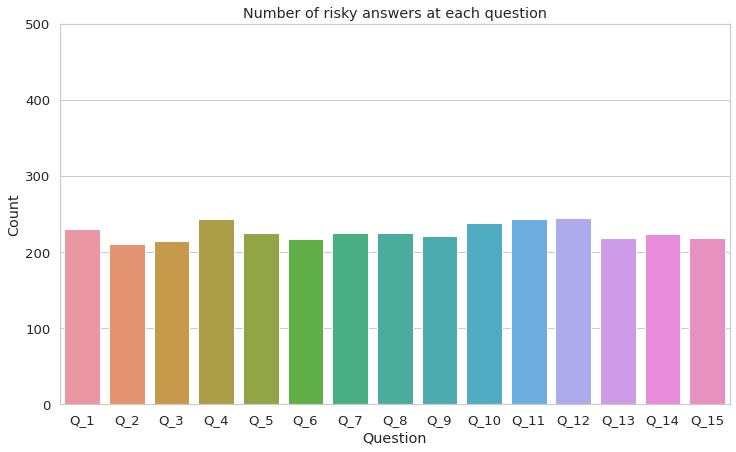

In [ ]:
sns.set(font_scale = 1.2)
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))

sns.barplot(x=columns_names[:-1], y=questions)

plt.ylim(0,len(data_1))
plt.xlabel('Question')
plt.ylabel('Count')
plt.title('Number of risky answers at each question')
plt.show()

In [ ]:
data_sum = data_1.sum(axis=1)

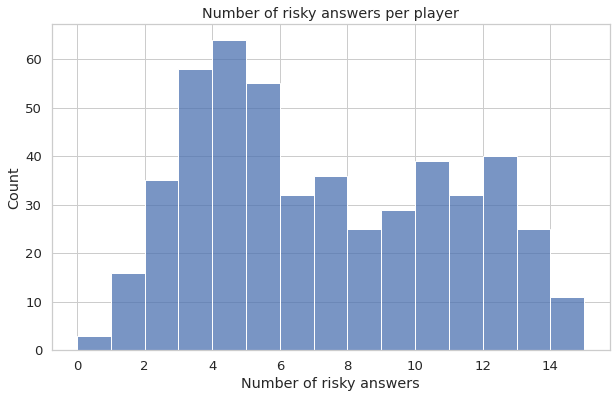

In [ ]:
sns.set(font_scale = 1.2)
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

sns.histplot(data_sum, bins=n_questions)

plt.xlabel('Number of risky answers')
plt.ylabel('Count')
plt.title('Number of risky answers per player')
plt.show()

## Inference: Bayesian Rasch Model

In [ ]:
!pip install --upgrade pystan

In [ ]:
!pip install nest-asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
import stan

model_stan = """
data {
  int<lower=1> J;                     // number of students
  int<lower=1> K;                     // number of questions
  int<lower=1> N;                     // number of observations
  array[N] int<lower=1, upper=J> jj;  // student for observation n
  array[N] int<lower=1, upper=K> kk;  // question for observation n
  array[N] int<lower=0, upper=1> y;   // correctness for observation n
}

parameters {
  real delta;            // mean student ability
  array[J] real alpha;   // ability of student j - mean ability
  array[K] real beta;    // difficulty of question k
}

model {
  alpha ~ normal(0, 1); // informative true prior
  beta ~ normal(0, 1); // informative true prior
  delta ~ normal(.75, 1); // informative true prior
  for (n in 1 : N) {
    y[n] ~ bernoulli_logit(alpha[jj[n]] - beta[kk[n]] + delta);
  }
}
"""
n_obs = n_players * n_questions

# Create array jj
players_obs = []
for i in range(n_players):
  players_obs.extend([i+1]*n_questions)

# Create array kk
questions_obs = list(range(1, n_questions+1))
questions_obs = questions_obs*n_players

# Create arra y
answers_obs = data_1.values.flatten()

data_stan = {'J':n_players, 
             'K':n_questions, 
             'N':n_obs, 
             'jj':players_obs, 
             'kk':questions_obs,  
             'y':answers_obs}

posterior = stan.build(model_stan, data=data_stan)
fit = posterior.sample(num_chains=4, num_samples=1000)
#eta = fit["eta"]  # array with shape (8, 4000)

df = fit.to_frame()  # pandas `DataFrame, requires pandas
df.values

In [ ]:
import stan

model_stan = """
data {
  int<lower=1> J;                     // number of students
  int<lower=1> K;                     // number of questions
  int<lower=1> N;                     // number of observations
  array[N] int<lower=1, upper=J> jj;  // student for observation n
  array[N] int<lower=1, upper=K> kk;  // question for observation n
  array[N] int<lower=0, upper=1> y;   // correctness for observation n
}

parameters {
  array[J] real <lower=-4, upper=4> alpha;   // ability of student j
  array[K] real <lower=0, upper=1> beta;    // difficulty of question k
}

model {
  alpha ~ uniform(-4, 4); // informative true prior
  beta ~ beta(1, 1); // informative true prior
  for (n in 1 : N) {
    y[n] ~ bernoulli_logit(alpha[jj[n]] * beta[kk[n]]);
  }
}
"""
n_obs = n_players * n_questions

# Create array jj
players_obs = []
for i in range(n_players):
  players_obs.extend([i+1]*n_questions)

# Create array kk
questions_obs = list(range(1, n_questions+1))
questions_obs = questions_obs*n_players

# Create arra y
answers_obs = data_1.values.flatten()

data_stan = {'J':n_players, 
             'K':n_questions, 
             'N':n_obs, 
             'jj':players_obs, 
             'kk':questions_obs,  
             'y':answers_obs}

posterior = stan.build(model_stan, data=data_stan)
fit = posterior.sample(num_chains=4, num_samples=1000)
#eta = fit["eta"]  # array with shape (8, 4000)

df = fit.to_frame()  # pandas `DataFrame, requires pandas
df.values

Building...



Building: 29.4s, done.Messages from stanc:
Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   1% (101/8000)
Sampling:   2% (200/8000)
Sampling:   4% (300/8000)
Sampling:   5% (400/8000)
Sampling:   6% (500/8000)
Sampling:   8% (600/8000)
Sampling:   9% (700/8000)
Sampling:  10% (800/8000)
Sampling:  11% (900/8000)
Sampling:  12% (1000/8000)
Sampling:  14% (1100/8000)
Sampling:  15% (1200/8000)
Sampling:  16% (1300/8000)
Sampling:  18% (1400/8000)
Sampling:  19% (1500/8000)
Sampling:  20% (1600/8000)
Sampling:  21% (1700/8000)
Sampling:  22% (1800/8000)
Sampling:  24% (1901/8000)
Sampling:  25% (2002/8000)
Sampling:  26% (2101/8000)
Sampling:  28% (2200/8000)
Sampling:  29% (2300/8000)
Sampling:  30% (2400/8000)
Sampling:  31% (2500/8000)
Sampling:  32% (2600/8000)
Sampling:  34% (2700/8000)
Sampling:  35% (2800/8000)
Sampling:  36% (2900/8000)
Sampling:  38% (3000/8000)
Sampling:  39% (3100/8000)
Sampling:  40% (3200/8000)
Sampling:  41% (3300/8000)
Sampling:  

array([[-4.29899648e+03,  9.18173183e-01,  1.95260856e-01, ...,
         8.25070762e-01,  4.01298534e-01,  5.23497589e-01],
       [-4.23896594e+03,  9.70053138e-01,  1.99859467e-01, ...,
         7.78229396e-01,  2.97562796e-01,  6.45487883e-01],
       [-4.26408751e+03,  4.54297367e-01,  1.89128144e-01, ...,
         9.08421013e-01,  4.40910177e-01,  6.32670800e-01],
       ...,
       [-4.27605575e+03,  9.93707469e-01,  1.99859467e-01, ...,
         7.50047214e-01,  3.83811421e-01,  5.63339473e-01],
       [-4.26468628e+03,  9.76807234e-01,  1.89128144e-01, ...,
         8.18163596e-01,  4.17967226e-01,  5.87568667e-01],
       [-4.28926443e+03,  8.65185997e-01,  2.03797179e-01, ...,
         8.21484886e-01,  3.86634425e-01,  5.64127602e-01]])

In [ ]:
df = fit.to_frame()  # pandas `DataFrame, requires pandas
df

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha.1,alpha.2,alpha.3,...,beta.6,beta.7,beta.8,beta.9,beta.10,beta.11,beta.12,beta.13,beta.14,beta.15
draws,,,,,,,,,,,,,,,,,,,,,
0,-4298.996483,0.918173,0.195261,4.0,15.0,0.0,4539.459937,-3.073610,1.706601,3.150964,...,0.726845,0.488539,0.614091,0.540481,0.167706,0.270499,0.135530,0.825071,0.401299,0.523498
1,-4238.965936,0.970053,0.199859,4.0,15.0,0.0,4502.174513,-3.855920,1.420618,3.690364,...,0.757354,0.489103,0.554765,0.397813,0.138877,0.310867,0.185933,0.778229,0.297563,0.645488
2,-4264.087505,0.454297,0.189128,4.0,15.0,0.0,4512.088110,-3.839248,3.137744,3.425226,...,0.646818,0.579195,0.443764,0.494377,0.235089,0.259636,0.121031,0.908421,0.440910,0.632671
3,-4279.198100,0.829715,0.203797,4.0,15.0,0.0,4532.231460,-3.968969,2.191565,3.858425,...,0.887832,0.593026,0.478255,0.402049,0.137761,0.288023,0.161694,0.727390,0.394676,0.649821
4,-4302.190145,0.879488,0.195261,4.0,31.0,0.0,4567.988488,-3.595711,3.120718,3.433453,...,0.655289,0.471430,0.483323,0.457053,0.195582,0.336769,0.076099,0.804263,0.403809,0.556600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-4271.742802,0.828633,0.203797,4.0,15.0,0.0,4527.870986,-1.533369,2.407565,3.137484,...,0.830696,0.524076,0.548113,0.377299,0.066975,0.327580,0.128799,0.722823,0.373364,0.574162
3996,-4296.388025,0.786206,0.195261,4.0,31.0,0.0,4552.851212,-3.809128,2.091317,3.086211,...,0.699228,0.504861,0.516549,0.446981,0.143477,0.297351,0.179001,0.712944,0.312069,0.632106
3997,-4276.055745,0.993707,0.199859,4.0,15.0,0.0,4548.706393,-1.182405,1.976776,3.689310,...,0.789969,0.495307,0.650379,0.517377,0.126414,0.307979,0.196454,0.750047,0.383811,0.563339


### Results

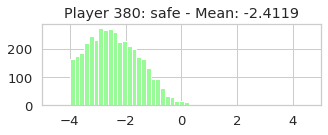

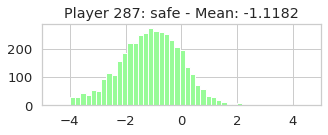

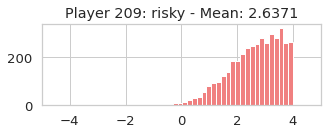

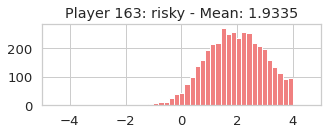

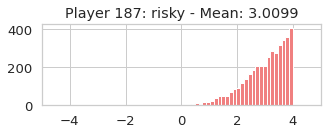

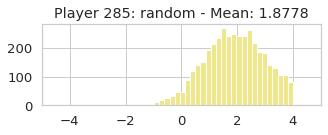

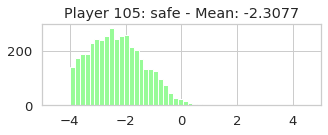

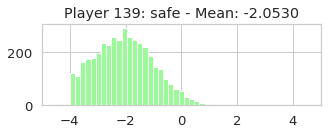

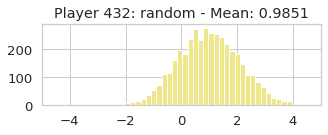

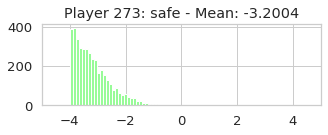

In [ ]:
players_plot = np.random.randint(1, 501, size=10)
for i in players_plot:
    # profile
    profile = Dataset.iloc[i,-1] 
    if profile == 'risky':
        color_hist = 'lightcoral'
    elif profile == 'random':
        color_hist = 'khaki'
    elif profile == 'safe':
        color_hist = 'palegreen'
    plt.figure(figsize=(5,1.5))
    plt.grid(True)
    plt.xlim([-5, 5])
    column_name = f'alpha.{i+1}'
    plt.hist(df[column_name], bins='auto', color=color_hist)
    plt.title(f'Player {i}: {profile} - Mean: {df[column_name].mean():.4f}')
    plt.show()

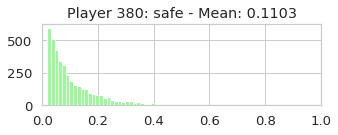

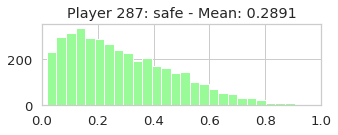

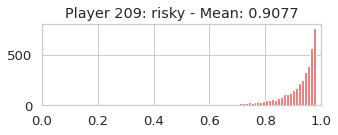

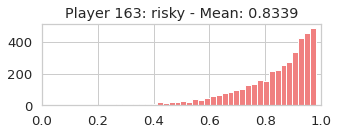

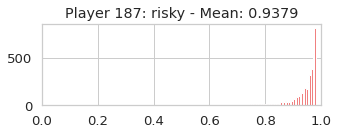

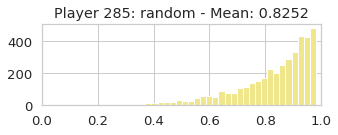

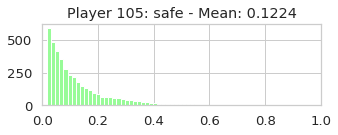

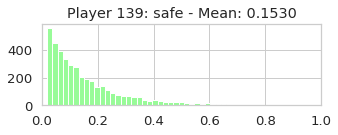

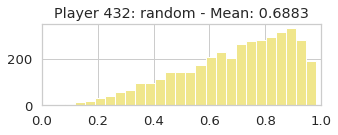

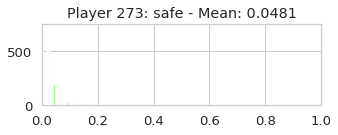

In [ ]:
# Expit
for i in players_plot:
    # profile
    profile = Dataset.iloc[i,-1] 
    if profile == 'risky':
        color_hist = 'lightcoral'
    elif profile == 'random':
        color_hist = 'khaki'
    elif profile == 'safe':
        color_hist = 'palegreen'
    plt.figure(figsize=(5,1.5))
    plt.grid(True)
    plt.xlim([0, 1])
    column_name = f'alpha.{i+1}'
    plt.hist(expit(df[column_name]), bins='auto', color=color_hist)
    plt.title(f'Player {i}: {profile} - Mean: {expit(df[column_name]).mean():.4f}')
    plt.show()

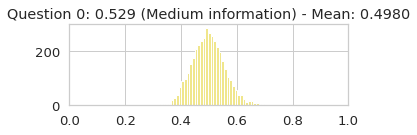

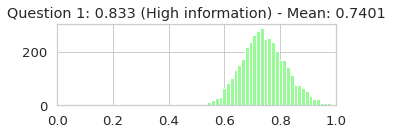

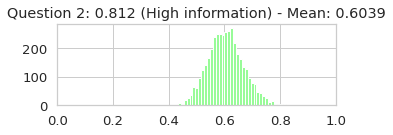

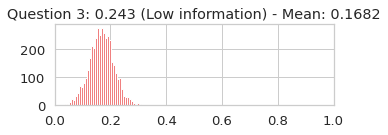

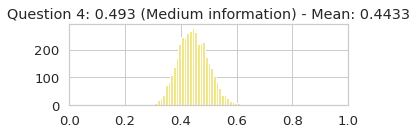

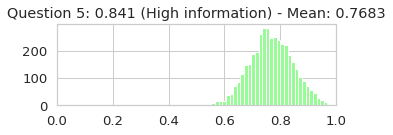

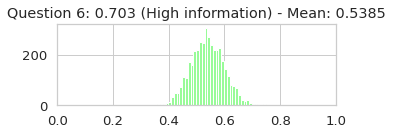

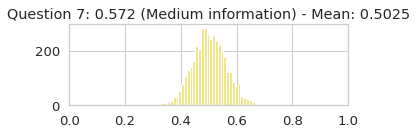

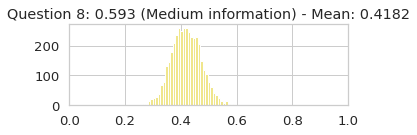

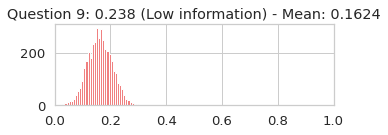

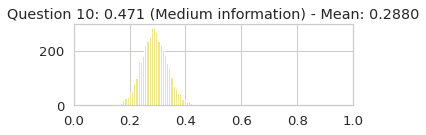

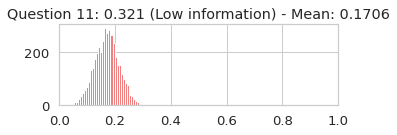

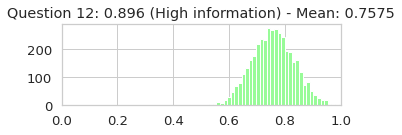

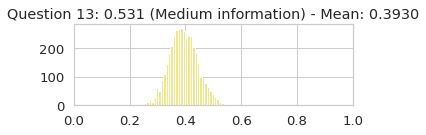

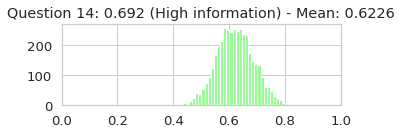

In [ ]:
for i in range(n_questions):
    # difficulty
    difficulty = game_1.difficulty_questions[i]
    if 0 <= difficulty < 0.33:
        diff_label = 'Low information'
        color_hist = 'lightcoral'
    elif 0.33 <= difficulty < 0.66:
        diff_label = 'Medium information'
        color_hist = 'khaki'
    elif 0.66 <= difficulty < 1:
        diff_label = 'High information'
        color_hist = 'palegreen'
    plt.figure(figsize=(5,1.5))
    plt.grid(True)
    plt.xlim([0, 1])
    column_name = f'beta.{i+1}'
    plt.hist(df[column_name], bins='auto', color=color_hist)
    plt.title(f'Question {i}: {difficulty:.3f} ({diff_label}) - Mean: {df[column_name].mean():.4f}')
    plt.show()